In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [8]:
#Load the data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input: (batch, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [14]:
#build the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 categories
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1, verbose=1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.7647 - loss: 0.6733 - val_accuracy: 0.8732 - val_loss: 0.3558
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8778 - loss: 0.3386 - val_accuracy: 0.8917 - val_loss: 0.2896
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9005 - loss: 0.2782 - val_accuracy: 0.8993 - val_loss: 0.2814
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9068 - loss: 0.2519 - val_accuracy: 0.8980 - val_loss: 0.2840
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9185 - loss: 0.2197 - val_accuracy: 0.9100 - val_loss: 0.2449


In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9088 - loss: 0.2718
Test Accuracy: 0.909500002861023


In [27]:
import numpy as np

predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


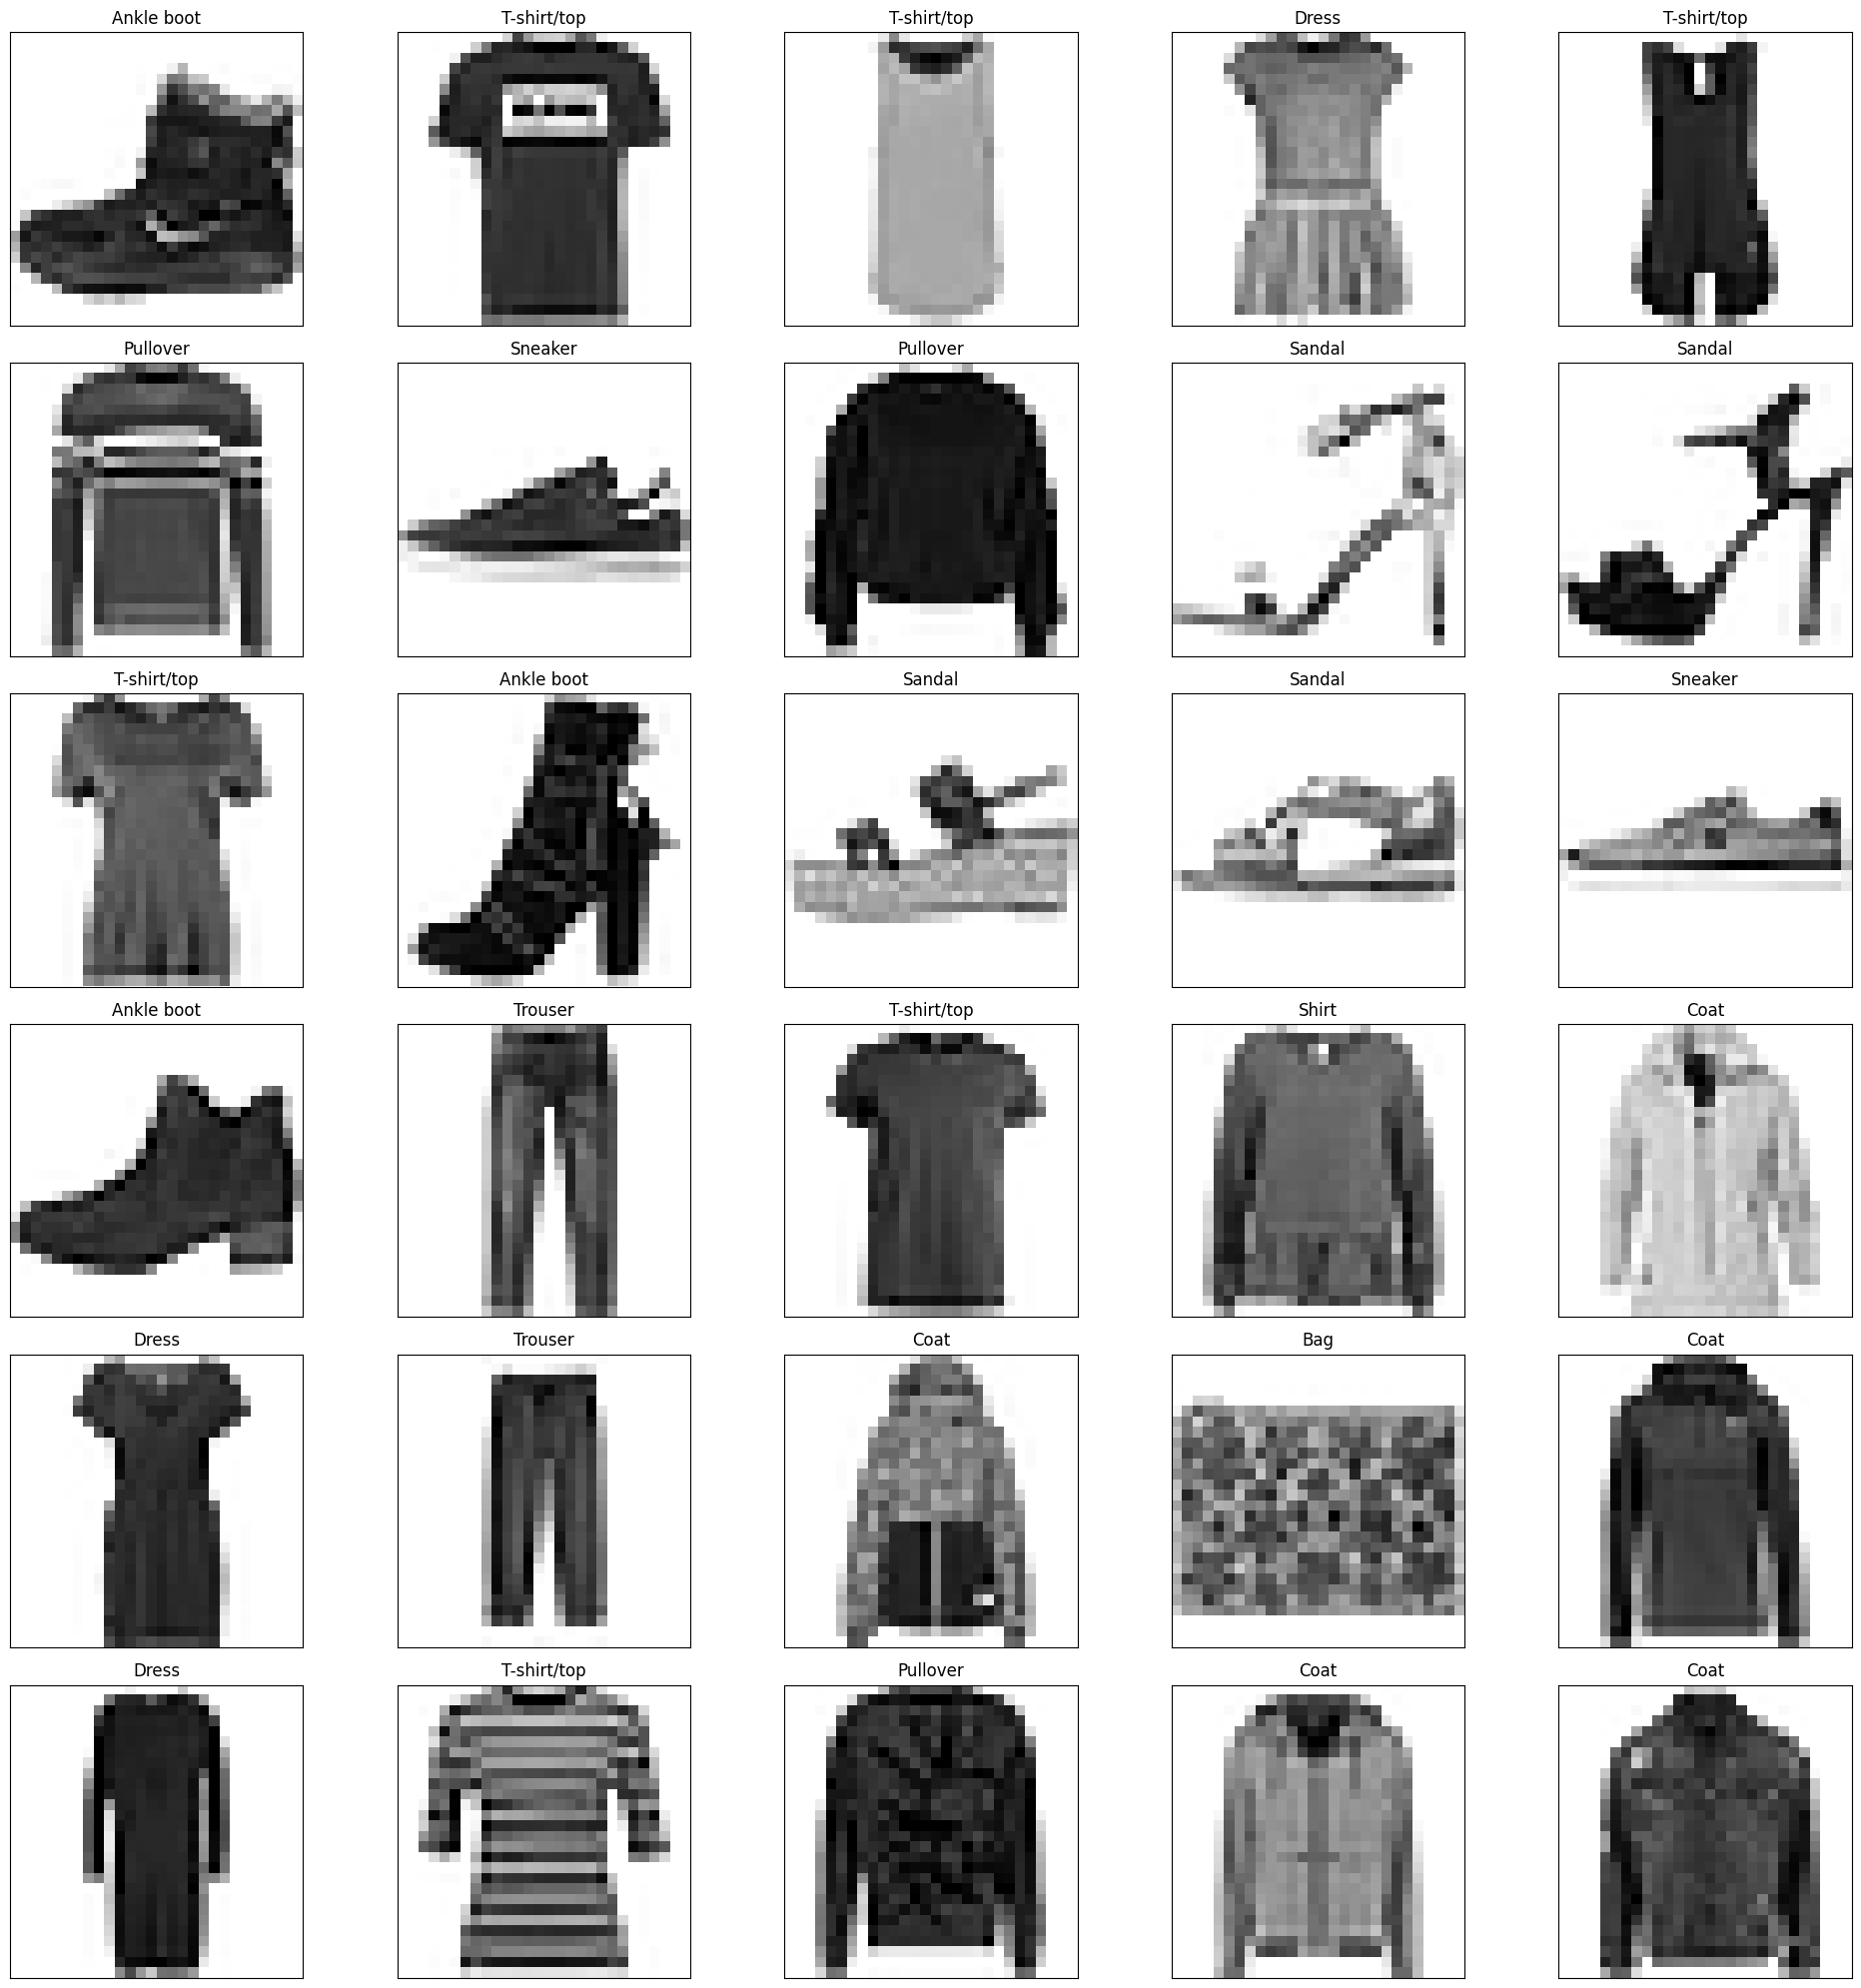

In [22]:
plt.figure(figsize =(20,20))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([]),plt.yticks([]),plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()